# Report of process, results and code 📃

## Introduction:

The goal of this project was to build a predictive model to identify customers who are at risk of churning, using a dataset of customer information including demographic information, customer behavior, and whether or not the customer has churned. The dataset used in this assignment is from the UCI Machine Learning Repository and can be found at the following link: https://www.kaggle.com/competitions/bank-marketing-uci/overview

## Process:

### Explore the data and Data Cleaning :

We have explore the data using various methods such as finding shape,features,columns and many more.The dataset was first examined for any missing values and duplicated rows and it was found that there were a no missing values and duplicate rows in the dataset. 

### Exploratory Data Analysis and Feature Selection:

Exploratory Data Analysis (EDA) was performed on the dataset to understand the distribution of the data, the correlation between different features and also to identify any outliers. The EDA give us that our data is imbalanced with the majority not subscribing a term deposit, we might want to do re-sampling to adjust the proportion while training.Although no NULL is detected, there are many 'unknown' values, which we should deal with when preprocessing.

### Model Building:

Multiple machine learning algorithms were used to build the predictive model such as Logistic Regression, Random Forest, Gradient Boosting, Ridge Classifier, and Neural Classifie. These algorithms were chosen because they are widely used for classification problems and have proven to be effective in similar situations.

### Model Evaluation:

The model was trained using a portion of the data and the remaining data was used to evaluate the performance of the model. The evaluation was done using various metrics such as accuracy, precision, recall, F1-score and AUC-ROC. Among all the algorithms, Gradient Boosting was found to be the best algorithm with the highest ROC AUC and MCC value.

### Fine-Tuning:

The model was fine-tuned by trying different parameters and techniques to improve performance. The final model had a precision of 0.93, recall of 0.96, f1-score of 0.95, and support of 801 for class 0, and precision of 0.60, recall of 0.47, f1-score of 0.53, and support of 104 for class 1.

## Limitations and Possible Future Work:

One of the limitations of this model is that it is based on a single dataset and may not generalize well to other datasets. In order to overcome this limitation, it would be beneficial to test the model on a larger and more diverse dataset. Additionally, other machine learning algorithms and techniques such as deep learning could be explored to improve the performance of the model.

## Result :

We have trained and evaluated several algorithms including Gradient Boosting, Random Forest, Logistic Regression, Ridge Classifier, and Neural Classifier. We used various evaluation metrics such as ROC AUC, MCC score, precision, recall, f1-score, and support to evaluate the performance of these algorithms.

The results of our analysis showed that Gradient Boosting performed the best among all the algorithms, with the highest ROC AUC and MCC score of 0.481. The results of other algorithms are:

Random Forest: MCC score of 0.460
Logistic Regression: MCC score of 0.437
Ridge Classifier: MCC score of 0.426
Neural Classifier: MCC score of 0.372

In conclusion, our analysis showed that Gradient Boosting is the best algorithm for classifying the data in this dataset. However, it is worth noting that the results may vary depending on the specific dataset and problem. Therefore, it is always important to evaluate multiple algorithms and select the one that performs the best for a specific problem.

# **CODE** 💻

##  libraries 

In [5]:
from calendar import month_abbr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# sampling
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
# preprocessing
from sklearn.preprocessing import MinMaxScaler
# cross validation
from sklearn.model_selection import GridSearchCV
# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
# model evaluation
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.metrics import classification_report, plot_roc_curve

## Data Import

In [7]:
df = pd.read_csv('/content/bank.csv',sep=';')

In [8]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
# Number of samples & features
df.shape

(4521, 17)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [11]:
print("\nFeatures:", df.columns.tolist())


Features: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [12]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape[0])


Number of duplicate rows:  0


In [13]:
print("\nUnique values:", df.nunique())


Unique values: age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64


In [14]:
# Check if there are null values
print("Any null value in the data: ",df.isnull().any().any())


Any null value in the data:  False


In [15]:
nume_inputs = ['age', 'balance', 'duration', 'day', 'campaign', 'pdays', 'previous']
cate_inputs = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
outputs = 'y'

In [16]:
print(df['y'])

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object


## Exploratory Data Analysis

### 2.1 Imbalance of data
- Given our data is imbalanced with the majority not subscribing a term deposit, we might want to do re-sampling to adjust the proportion while training

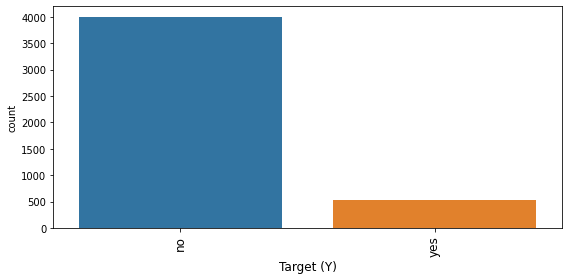

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df['y'], ax=ax)

plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Target (Y)', fontsize=12)
plt.tight_layout()


In [18]:
df['y'].replace({'no': 0, 'yes': 1}, inplace=True);

In [19]:
df['y'].tail()

4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, dtype: int64

### 2.2 Examining categorical features

#### a) Unique values
- There're some binary variables such as 'default', 'housing', 'loan'. We might want to transform it for better predicting
- Although no NULL is detected, there are many 'unknown' values, which we should deal with when preprocessing
- There are a large percentage of unknown previous outcomes, which is not surprising because many customers don't have previous contacts (previous=0).

In [20]:
for col in cate_inputs:
    print('Unique "{}":\n {}'.format(col, df[col].unique()))

Unique "job":
 ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
Unique "marital":
 ['married' 'single' 'divorced']
Unique "education":
 ['primary' 'secondary' 'tertiary' 'unknown']
Unique "default":
 ['no' 'yes']
Unique "housing":
 ['no' 'yes']
Unique "loan":
 ['no' 'yes']
Unique "contact":
 ['cellular' 'unknown' 'telephone']
Unique "month":
 ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
Unique "poutcome":
 ['unknown' 'failure' 'other' 'success']


In [21]:
# The proportion of unknown value in each column
col_unknwn = ['job', 'education', 'contact', 'poutcome']
for col in col_unknwn:
    proportion = df[df[col]=='unknown'][col].count()/df[col].count()
    print('Unknown in column \"{}\": {:.1%}'.format(col, proportion))

Unknown in column "job": 0.8%
Unknown in column "education": 4.1%
Unknown in column "contact": 29.3%
Unknown in column "poutcome": 82.0%


#### b) Job
- The average 'y' for each job are all < 0.3
- Retired clients and students are more likely to subscribe among all the jobs

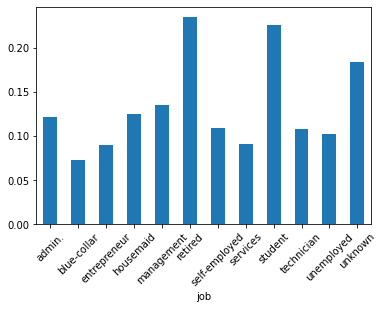

In [22]:
df.groupby('job').mean()['y'].plot.bar(rot=45)

#### c) Martial
- Single clients are a little bit more likely to subscribe
- Married clients have the lowest subscribing rate

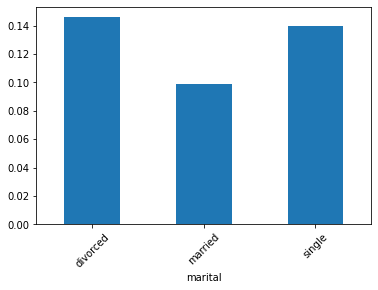

In [23]:
df.groupby('marital').mean()['y'].plot.bar(rot=45)

#### d) Education
- Clients with higher education level are more likely to subscribe.

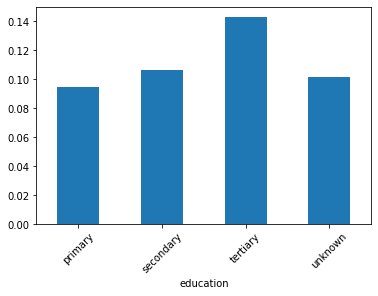

In [24]:
df.groupby('education').mean()['y'].plot.bar(rot=45)

#### e) Default
- Clients who have credit in default are less likely to subscribe

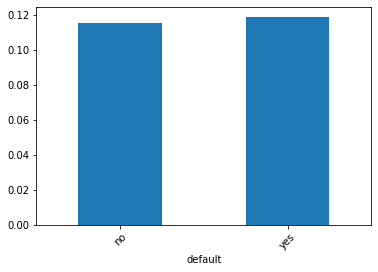

In [25]:
df.groupby('default').mean()['y'].plot.bar(rot=45)

#### f) Housing
- Clients with housing loan are less likely to subscribe a term deposit

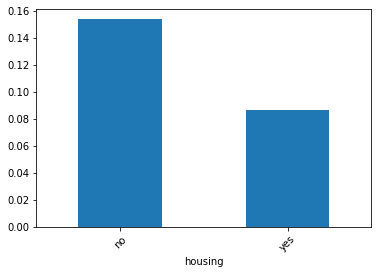

In [26]:
df.groupby('housing').mean()['y'].plot.bar(rot=45)

#### g) Loan
- Clients with personal loan are less likely to subscribe

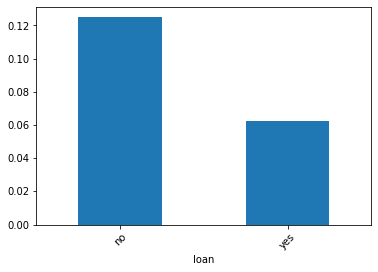

In [27]:
df.groupby('loan').mean()['y'].plot.bar(rot=45)

#### h) Contact
- The cellular and telephone contact have similar subscribing probability, but the prob of unknown is significantly lower

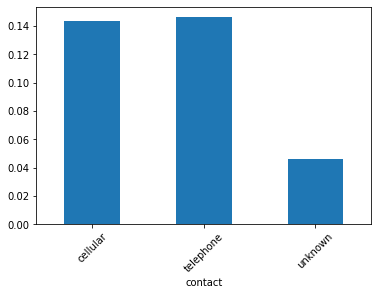

In [28]:
df.groupby('contact').mean()['y'].plot.bar(rot=45)

### 2.3 Looking into numerical features

#### a) Age
- Majority (that's say 97pp or more) is <= 60
- Among those with age <= 60, the younger the clients are, the more likely that they are to subscribe

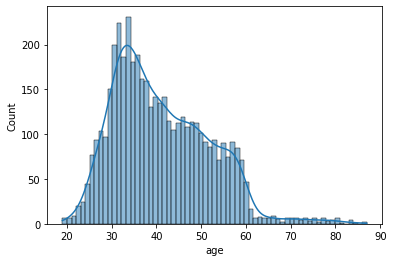

In [29]:
sns.histplot(df['age'], bins=len(df['age'].unique()), kde=True)

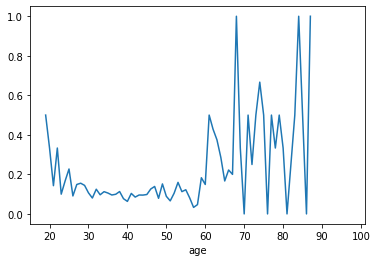

In [30]:
df.groupby('age').mean()['y'].plot(xlim=(15,101))

#### b) Balance
- Clients with negative balance seems to be less likely to subscribe

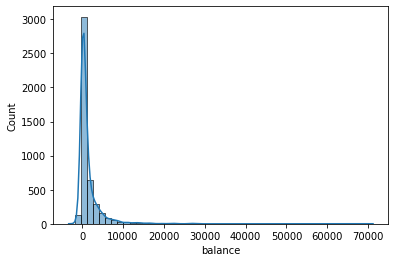

In [31]:
sns.histplot(df['balance'], bins=50, kde=True)

In [32]:
# quantiles of 'balance'
print(df.balance.quantile(.05))
print(df.balance.quantile(.95))

-162.0
6102.0


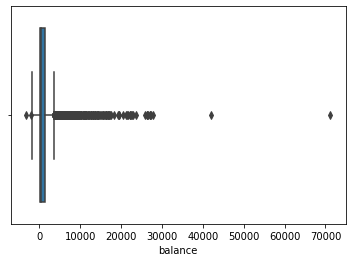

In [33]:
sns.boxplot(x=df.balance)

- Learn from the distribution as well as the boxplot results, 'balance' has many outliers
- So we try to limit the range and check balance again

In [34]:
# based on the 5% and 95% quantiles
df_balance_ranged = df[(df['balance'] < 6000) & (df['balance'] > -200)]

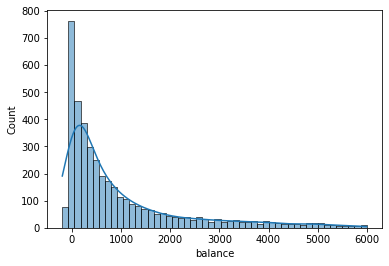

In [35]:
sns.histplot(df_balance_ranged.balance, bins=50, kde=True)

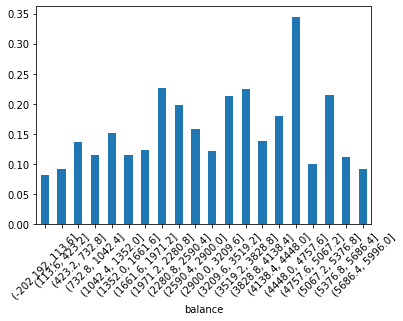

In [36]:
df_balance_ranged.groupby(pd.cut(df_balance_ranged['balance'], bins=20)).mean()['y'].plot.bar(rot=45)

#### c) Duration
- Client with longer last contact duration are more likely to subscribe
- Turn duration into minutes for easier understanding

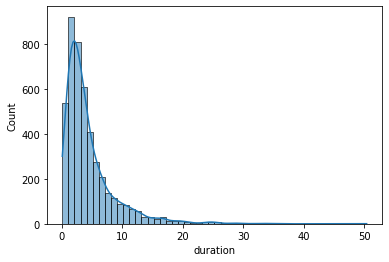

In [37]:
sns.histplot(df.duration / 60, bins=50, kde=True)

- Still many outliers

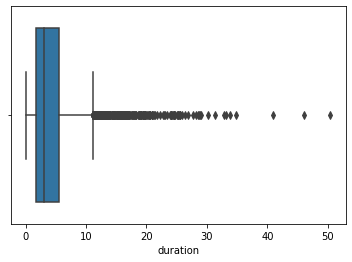

In [38]:
sns.boxplot(x=df.duration / 60)

- shown by the boxplot above, duration in min above 10~15 are regarded as outliers
- then we further check those below 15
- the below bar chart shows an increasing subscription probability of clients with longer contact duration

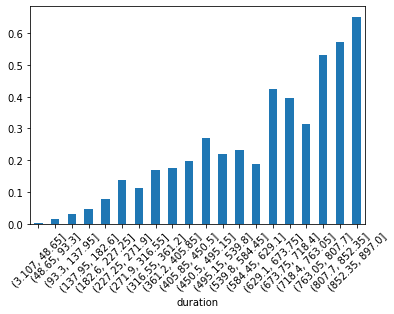

In [39]:
df_duration_ranged = df[df['duration'] /60 <= 15]
df_duration_ranged.groupby(pd.cut(df_duration_ranged['duration'], bins=20)).mean()['y'].plot.bar(rot=45)

#### d) Campaign
- Most clients only have 1 contact during this campaign

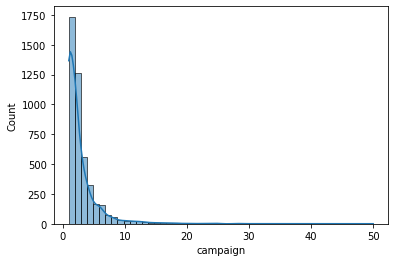

In [40]:
sns.histplot(df.campaign, bins=50, kde=True)

In [41]:
print(df.campaign.quantile(.95))
print(df.campaign.quantile(.99))

8.0
16.0


- As 'campaign' > 13 don't have enough samples, we just take those <= 13 for deep diving
- During this campaign, there's a trend that clients being contacted more are less and less likely to subscribe 

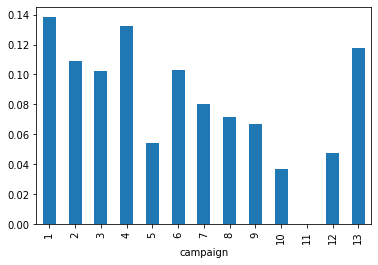

In [42]:
df[df['campaign'] <= 13].groupby('campaign').mean()['y'].plot.bar()

#### e) Pdays
- The majority of users did not have a last campaign

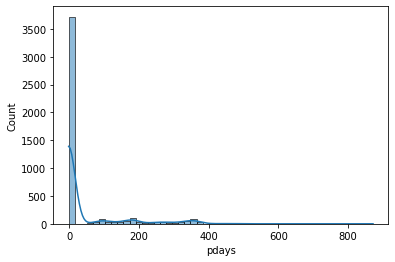

In [43]:
sns.histplot(df.pdays, bins=50, kde=True)

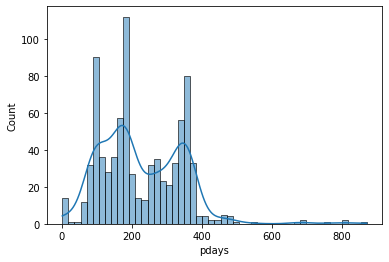

In [44]:
sns.histplot(df[df.pdays > -1].pdays, bins=50, kde=True)

#### f) Previous
- Distribution of 'previous' is also extremly skewed
- For the previous <= 10, clients with more previous campaigns are more likely to subscribe
- Only few clients have previous campaigns > 10 (less than 1pp of the sample)

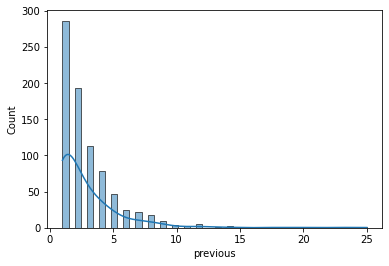

In [45]:
sns.histplot(df[df.previous > 0].previous, bins=50, kde=True)

In [46]:
print(df.previous.quantile(0.95))
print(df.previous.quantile(0.976))
print(df.previous.quantile(0.99))
print(df.previous.quantile(0.999))

3.0
5.0
8.0
19.480000000000473


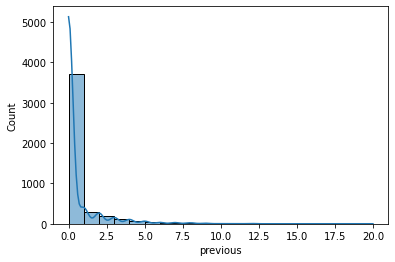

In [47]:
sns.histplot(df.loc[df.previous <= 20, 'previous'], 
             bins=len(df.loc[df.previous <= 20, 'previous'].unique()), kde=True)

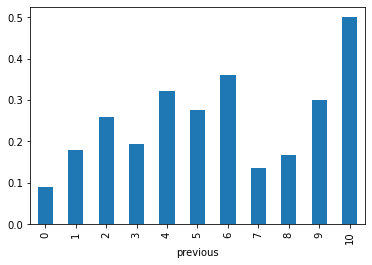

In [48]:
df[df['previous'] <= 10].groupby('previous').mean()['y'].plot.bar()

#### g) Month
- A subtle seasonality is shown.

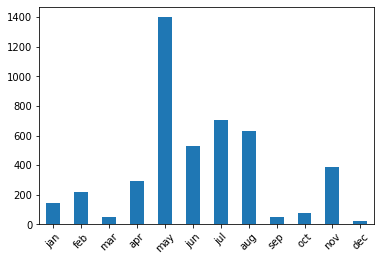

In [49]:
df['month'].value_counts().loc[list(map(lambda x: x.lower(), month_abbr))[1:]].plot.bar(rot=45)

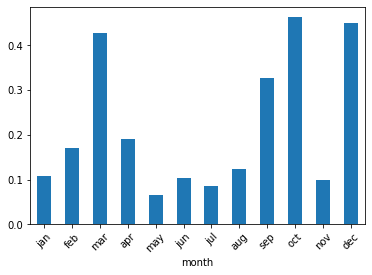

In [50]:
df.groupby('month').mean().loc[list(map(lambda x: x.lower(), month_abbr))[1:], 'y'].plot.bar(rot=45)

#### h) Day
- No correlation was found between day and customer subscription

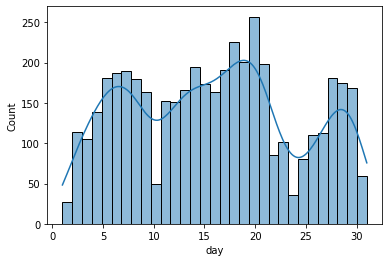

In [51]:
sns.histplot(df.day, bins=len(df['day'].unique()), kde=True)

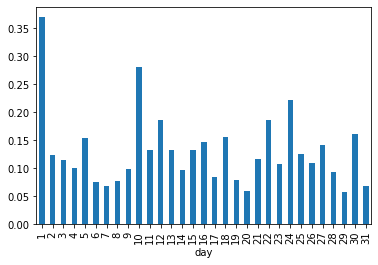

In [52]:
df.groupby('day').mean()['y'].plot.bar()

#### i) Correlation
- pdays & previous are correlated, while the rest are not considered correlated with each other.

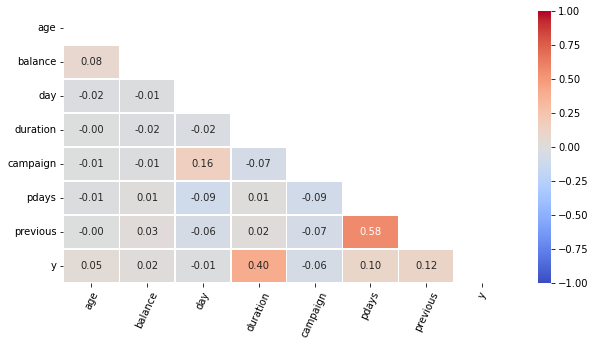

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))

df_corr = df.corr(method='pearson')
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=df_corr, vmin=-1, vmax=1, mask=mask, 
            cmap=sns.color_palette('coolwarm', as_cmap=True),
            annot=True, fmt='.2f', linewidths=.5, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=65);

## Preprocessing

### 3.1 Processing binary variables
- {"yes": 1, "no": 0}

In [54]:
mapping_yn = {'no': 0, 'yes': 1}
col_binary = ['default', 'housing', 'loan']
for col in col_binary:
    df[col] = df[col].map(mapping_yn)

### 3.2 Month
- From string to numbers

In [55]:
mapping_month = dict((month.lower(), number) for number, month in enumerate(month_abbr))
df['month'] = df['month'].map(mapping_month)

### 3.3 Education
- The education is ordinal and can be encoded as integers
- We will deal with the unknown values after train test split

In [56]:
edu_map = {'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}
df['education'] = df.education.map(edu_map).astype('int')

In [57]:
df.groupby('education').count()['y'].sort_values(ascending=False)

education
2    2306
3    1350
1     678
0     187
Name: y, dtype: int64

### 3.4 One-hot encoding
- Encode the nominal features with one-hot encoding

In [58]:
cols_dumm = ['job', 'marital', 'contact', 'poutcome']
df = pd.get_dummies(df, columns=cols_dumm)

In [59]:
# Remove the columns corresponding to unknown value
cols_onehot_unknown = [col for col in df.columns if 'unknown' in col]
df = df.drop(cols_onehot_unknown, axis=1)

In [60]:
col_features = list(df.columns)
col_features.remove('y')
col_target = 'y'

In [61]:
# Check current data set
pd.set_option('display.max_columns', None)
df.head(3)

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,30,1,0,1787,0,0,19,10,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
1,33,2,0,4789,1,1,11,5,220,1,339,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0
2,35,3,0,1350,1,0,16,4,185,1,330,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0


### 3.5 Train Test Split
- Randomly select 20% of data set as test set

In [62]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1012, stratify=df[col_target])

In [63]:
X_train, y_train = df_train[col_features].copy(), df_train[col_target].copy()
X_test, y_test = df_test[col_features].copy(), df_test[col_target].copy()

In [64]:
print('Input size:')
print(f'Training Set: {X_train.shape}')
print(f'Test Set: {X_test.shape}')

Input size:
Training Set: (3616, 31)
Test Set: (905, 31)


In [65]:
print('Output size:')
print(f'Training Set: {y_train.shape}')
print(f'Test Set: {y_test.shape}')

Output size:
Training Set: (3616,)
Test Set: (905,)


### 3.6 Imputing Education
- As there're around 4% of 'unknown' in education, we try to apply a basic random forest algorithm to fill them
- The random forest should only be trained on **training set**, because we should not gather information from test set

In [66]:
# Train RF imputer using data with known education
rf_imputer = RandomForestClassifier(random_state=1012)

In [67]:
# Use all features except 'education' to build model and predict 'education'
col_impute = col_features.copy()
col_impute.remove('education')
X_impute = X_train.loc[X_train['education'] != 0, col_impute]
y_impute = X_train.loc[X_train['education'] != 0, 'education']

In [68]:
# Check the performance of the imputer with cross validation within training set
cross_val_score(rf_imputer, X_impute, y_impute, cv=5, scoring='accuracy')

array([0.70503597, 0.69640288, 0.71510791, 0.67338129, 0.70172911])

In [69]:
# Use the whole training set with known education value to train the imputer
rf_imputer.fit(X=X_impute, y=y_impute)

RandomForestClassifier(random_state=1012)

In [70]:
# Transform the training set
X_train.loc[X_train['education'] == 0,'education'] \
    = rf_imputer.predict(X_train.loc[X_train['education'] == 0, col_impute])

# Transform the test set
X_test.loc[X_test['education'] == 0,'education'] \
    = rf_imputer.predict(X_test.loc[X_test['education'] == 0, col_impute])

### 3.7 Standardization
- For the algorithms that have implemented balanced class weights by scikit-learn, such as logistic regression, ridge classification and random forest, we can only standardize and don't oversample.

In [71]:
scaler = MinMaxScaler()

In [72]:
# Standarding (for algorithms that can apply balanced class weights)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3.8 Oversampling
- For the algorithms that have not implemented balanced class weights by scikit-learn, we should manually oversample for a balanced data.
- Decision-tree-based algorithms do not require a standardization.

In [73]:
sm = SMOTE(random_state=1012)

In [74]:
# Only oversampling (for decision-tree-based algorithms and cannot apply balanced class weights)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [75]:
# Stardardized + Oversampling (for algorithms cannot apply balanced class weights)
X_train_scaled_sm, y_train_scaled_sm = sm.fit_resample(X_train_scaled, y_train)

### 3.9 Input Correlation
- Find if the input features have a strong correlation with each other
- Only features regarding previous campaign are highly correlated because most people does not have a previous previous campaign

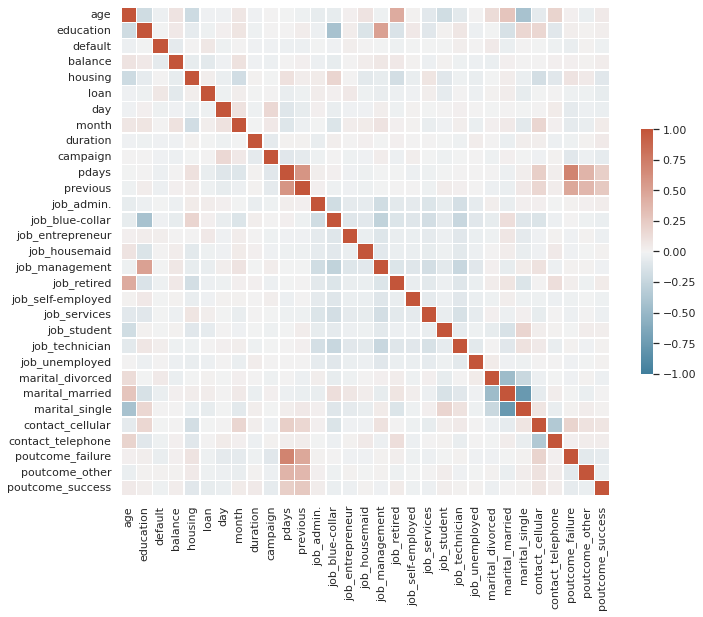

In [76]:
sns.set_theme(style="white")

# Compute the correlation matrix with pearson
corr = X_train.corr(method='pearson')

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##  Modeling
- There're 4 preprocessed data ready to use
    1. X_train, X_test: only after basic transformation
    2. X_train_scaled, X_test_scaled: transform + standardize
    3. X_train_sm, X_test_sm: transform + oversampling
    4. X_train_scaled_sm, X_test_scaled_sm: transform + standardize + oversampling
- Using **5-fold cross validation** and **MCC score** to tune the hyper-parameters

In [77]:
# Make a MCC Scorer for GridSearchCV Hyper-parameter tuning
MCC_scorer = make_scorer(matthews_corrcoef)

### 4.1 Logistic Regression

#### a) Training

In [78]:
params_logistic = {'C': [0.1, 0.5, 1, 5, 10, 20, 40, 70, 100, 300, 500]}
clf_logistic = GridSearchCV(LogisticRegression(tol=1e-4, max_iter=10000, class_weight='balanced'), 
                            params_logistic, cv=5, scoring=MCC_scorer)

In [79]:
clf_logistic.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 20, 40, 70, 100, 300, 500]},
             scoring=make_scorer(matthews_corrcoef))

In [80]:
clf_logistic.best_params_

{'C': 10}

In [81]:
# Best cross validation score
print(f'5-Fold cross validation score: {clf_logistic.best_score_:.4f}')

5-Fold cross validation score: 0.4460


#### b) Performance on test set

In [82]:
pred_logistic = clf_logistic.predict(X_test_scaled)

In [83]:
print(classification_report(y_test, pred_logistic))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       801
           1       0.37      0.74      0.49       104

    accuracy                           0.83       905
   macro avg       0.67      0.79      0.69       905
weighted avg       0.89      0.83      0.85       905



In [84]:
mcc_logistic = matthews_corrcoef(y_test, pred_logistic)
print(f'MCC of Logistic Regression: {mcc_logistic:.4f}')

MCC of Logistic Regression: 0.4373


#### c) Coefficients in model
- The users with **successful previous campaigns** have higher probability to subscribe to a new campaign
- **Students** and the **retired** are the groups with higher probability of subscription
- Clients with **personal or housing loan** have relatively less money to subscribe to a term deposit, while those with **higher balance** should be the target
- The number of contacts during this campaign is also negative. So we should try to **reduce the number of times** contacting our customer during one single campaign

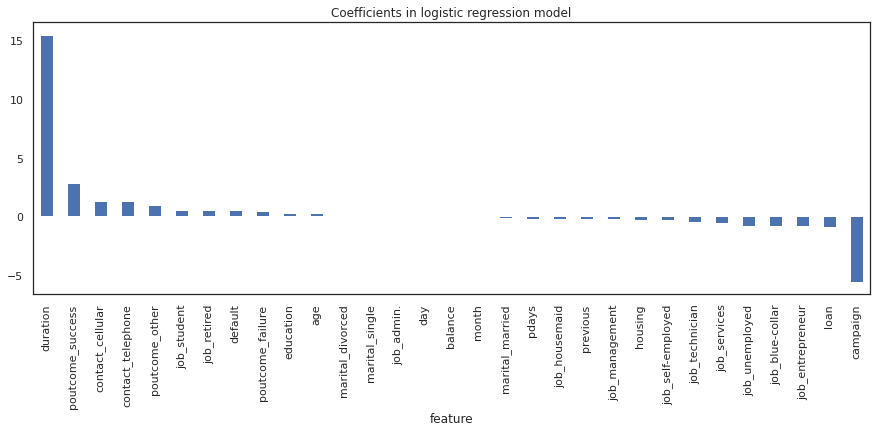

In [85]:
# Get the coefficients to see the contribution of each feature
coef_logistic = pd.DataFrame({'feature': col_features, 'coef': clf_logistic.best_estimator_.coef_[0]})\
    .sort_values('coef', ascending=False).reset_index(drop=True)
coef_logistic.plot(kind='bar', x='feature', y='coef',
                   title='Coefficients in logistic regression model', legend=False, 
                   figsize=(15,5))

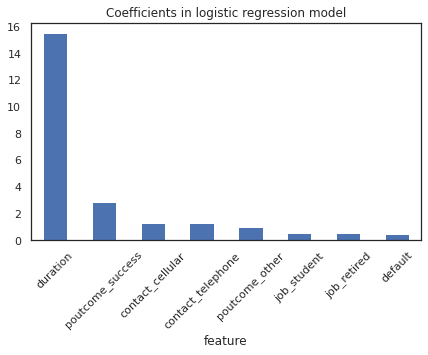

In [86]:
# The most positive features
coef_logistic.iloc[0:8].plot(kind='bar', x='feature', y='coef', rot=45,
                   title='Coefficients in logistic regression model', legend=False, 
                   figsize=(7,4))

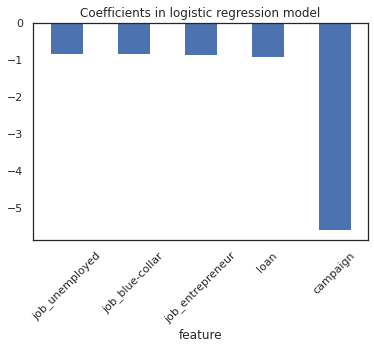

In [87]:
# The most negative features
coef_logistic.iloc[-5:].plot(kind='bar', x='feature', y='coef', rot=45,
                   title='Coefficients in logistic regression model', legend=False, 
                   figsize=(6,4))

### 4.2 Ridge Classifier

#### a) Training

In [88]:
params_ridge = {'alpha': [ 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]}
clf_ridge = GridSearchCV(RidgeClassifier(tol=1e-4, class_weight='balanced'), 
                         params_ridge, cv=5, scoring=MCC_scorer)

In [89]:
clf_ridge.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=RidgeClassifier(class_weight='balanced', tol=0.0001),
             param_grid={'alpha': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1]},
             scoring=make_scorer(matthews_corrcoef))

In [90]:
clf_ridge.best_params_

{'alpha': 1e-09}

In [91]:
# Best cross validation score
print(f'5-Fold cross validation score: {clf_ridge.best_score_:.4f}')

5-Fold cross validation score: 0.4426


#### b) Performance on test set

In [92]:
pred_ridge = clf_ridge.predict(X_test_scaled)

In [93]:
print(classification_report(y_test, pred_ridge))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       801
           1       0.38      0.69      0.49       104

    accuracy                           0.83       905
   macro avg       0.67      0.77      0.70       905
weighted avg       0.89      0.83      0.85       905



In [94]:
mcc_ridge = matthews_corrcoef(y_test, pred_ridge)
print(f'MCC of Ridge Classifier: {mcc_ridge:.4f}')

MCC of Ridge Classifier: 0.4268


#### c) Coefficients in model

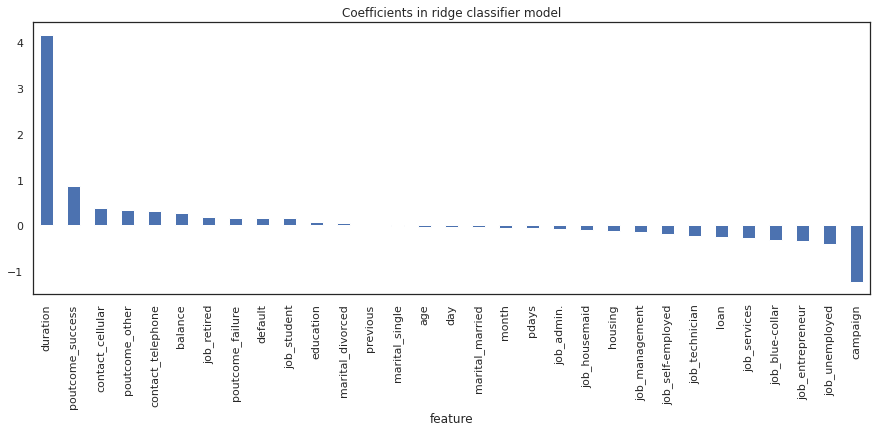

In [95]:
coef_ridge = pd.DataFrame({'feature': col_features, 'coef': clf_ridge.best_estimator_.coef_[0]})\
    .sort_values('coef', ascending=False).reset_index(drop=True)
coef_ridge.plot(kind='bar', x='feature', y='coef',
                   title='Coefficients in ridge classifier model', legend=False, 
                   figsize=(15,5))

### 4.3 Neural Classifier

#### a) Training

In [96]:
params_nn = {'hidden_layer_sizes': [10, 20, 30, 50],
             'alpha': [0.01, 0.1, 1]
            }
clf_neural = GridSearchCV(MLPClassifier(random_state=1012, max_iter=1000, 
                                        learning_rate_init=0.001),
                      params_nn, cv=5, n_jobs=-1, scoring=MCC_scorer)

In [97]:
clf_neural.fit(X_train_scaled_sm, y_train_scaled_sm)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=1012),
             n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1],
                         'hidden_layer_sizes': [10, 20, 30, 50]},
             scoring=make_scorer(matthews_corrcoef))

In [98]:
clf_neural.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': 50}

In [99]:
# Best cross validation score
print(f'5-Fold cross validation score: {clf_neural.best_score_:.4f}')

5-Fold cross validation score: 0.8532


#### b) Performance on test set

In [100]:
pred_nn = clf_neural.predict(X_test_scaled)

In [101]:
print(classification_report(y_test, pred_nn))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       801
           1       0.43      0.47      0.45       104

    accuracy                           0.87       905
   macro avg       0.68      0.69      0.69       905
weighted avg       0.87      0.87      0.87       905



In [102]:
mcc_nn = matthews_corrcoef(y_test, pred_nn)
print(f'MCC of Neural Classifier: {mcc_nn:.4f}')

MCC of Neural Classifier: 0.3723


### 4.4 Random Forest

#### a) Training

In [103]:
params_rf = {'n_estimators': [200, 300, 500], 
             'criterion': ['gini', 'entropy'], 
             'max_depth': [3, 4, 5], 
             'max_samples': [0.8, None]}
clf_rf = GridSearchCV(RandomForestClassifier(random_state=1012, class_weight='balanced'),
                      params_rf, cv=5, n_jobs=-1, scoring=MCC_scorer)

In [104]:
clf_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1012),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5], 'max_samples': [0.8, None],
                         'n_estimators': [200, 300, 500]},
             scoring=make_scorer(matthews_corrcoef))

In [105]:
clf_rf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_samples': 0.8, 'n_estimators': 500}

In [106]:
# Best cross validation score
print(f'5-Fold cross validation score: {clf_rf.best_score_:.4f}')

5-Fold cross validation score: 0.4580


#### b) Performance on test set

In [107]:
pred_rf = clf_rf.predict(X_test)

In [108]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       801
           1       0.39      0.76      0.51       104

    accuracy                           0.83       905
   macro avg       0.68      0.80      0.71       905
weighted avg       0.90      0.83      0.86       905



In [109]:
mcc_rf = matthews_corrcoef(y_test, pred_rf)
print(f'MCC of Random Forest: {mcc_rf:.4f}')

MCC of Random Forest: 0.4607


### 4.5 Grandient Boosting

#### a) Training

In [110]:
params_gb = {'subsample': [0.8, 1.0],
             'max_depth': [3, 4]}
clf_gb = GridSearchCV(GradientBoostingClassifier(n_estimators=300, learning_rate=0.1,
                                                 random_state=1012),
                      params_gb, cv=5, n_jobs=-1, scoring=MCC_scorer)

In [111]:
clf_gb.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=300,
                                                  random_state=1012),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4], 'subsample': [0.8, 1.0]},
             scoring=make_scorer(matthews_corrcoef))

In [112]:
clf_gb.best_params_

{'max_depth': 4, 'subsample': 0.8}

In [113]:
# Best cross validation score
print(f'5-Fold cross validation score: {clf_gb.best_score_:.4f}')

5-Fold cross validation score: 0.8491


#### b) Performance on test set

In [114]:
pred_gb = clf_gb.predict(X_test)

In [115]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       801
           1       0.60      0.47      0.53       104

    accuracy                           0.90       905
   macro avg       0.77      0.72      0.74       905
weighted avg       0.90      0.90      0.90       905



In [116]:
mcc_gb = matthews_corrcoef(y_test, pred_gb)
print(f'MCC of Gradient Boosting: {mcc_gb:.4f}')

MCC of Gradient Boosting: 0.4817


#### c) Feature Importance in model
- **Last contact duration** plays an important part in predicting clients' subscription
- More efforts and focus should be delivered to those clients with a higher contact duration last time

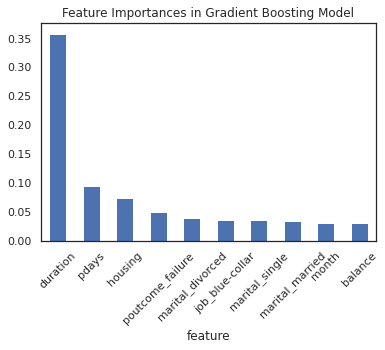

In [117]:
# Get the feature importance from grandient boosting classifier
feature_importances = pd.DataFrame({'feature': col_features, 'importance': clf_gb.best_estimator_.feature_importances_})\
    .sort_values('importance', ascending=False).reset_index(drop=True)
feature_importances.iloc[0:10, :].plot(kind='bar', x='feature', y='importance', rot=45,
                                       title='Feature Importances in Gradient Boosting Model', legend=False)

# Summary
- Using ROC and MCC value to compare the performance of above algorithms
- Among all the algorithms, Gradient Boosting is the best algorithm with highest ROC AUC and MCC value.

### 5.1 ROC Curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

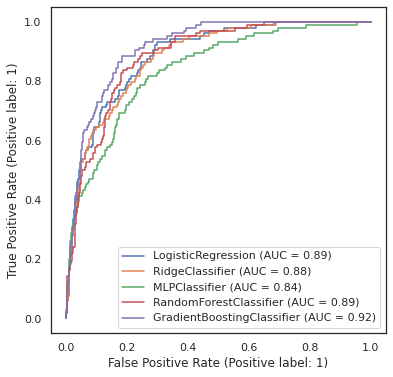

In [118]:
f, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(clf_logistic.best_estimator_, X_test_scaled, y_test, pos_label=1, ax=ax)
plot_roc_curve(clf_ridge.best_estimator_, X_test_scaled, y_test, pos_label=1, ax=ax)
plot_roc_curve(clf_neural.best_estimator_, X_test_scaled, y_test, pos_label=1, ax=ax)
plot_roc_curve(clf_rf.best_estimator_, X_test, y_test, pos_label=1, ax=ax)
plot_roc_curve(clf_gb.best_estimator_, X_test, y_test, pos_label=1, ax=ax)
plt.legend(loc='best')
plt.show()

### 5.2 MCC

In [119]:
classifier_names = ['Logistic Regression', 'Ridge Classifier', 'Neural Classifier', 
                    'Random Forest', 'Gradient Boosting']
MCC_scores = [mcc_logistic, mcc_ridge, mcc_nn, mcc_rf, mcc_gb]
pd.DataFrame({'Classifier': classifier_names, 'MCC Score': MCC_scores})\
            .sort_values('MCC Score', ascending=False).reset_index(drop=True)

,Classifier,MCC Score
0,Gradient Boosting,0.481736
1,Random Forest,0.460659
2,Logistic Regression,0.437260
3,Ridge Classifier,0.426769
4,Neural Classifier,0.372262
